In [78]:
## 导入包
import numpy as np
import pandas as pd
# import torch
# import torch.nn as nn
# from torchinfo import summary
# from torch.utils.data import TensorDataset, DataLoader, random_split, Subset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,accuracy_score
import matplotlib.pyplot as plt
# from imblearn.under_sampling import RandomUnderSampler # 多数样本下采样
from sklearn.svm import SVC

In [ ]:
## 提取inventory里的信息
inv = pd.read_csv("/home/anichikage/workspace/dram/dram-failure-prediction/data/raw/ali/inventory.csv")
print(inv)

In [3]:
inv_info = inv[['server_manufacturer', 'DRAM_model', 'DIMM_number']]

train_server_id = np.load('train_server_id.npy')
test_server_id = np.load('test_server_id.npy')

In [4]:
# 提取物理信息
def inv_feature_extract(inv_info, server_id):
    # 提取特定行
    server_info = inv_info.iloc[server_id]
    server_info = np.vstack(server_info.values)
    data = server_info
    
    # 将信息转为数字
    mapping_col1 = {'M1': 1, 'M2': 2, 'M3': 3, 'M4': 4}
    mapping_col2 = {'A1': 1, 'A2': 2, 'B1': 3, 'B2': 4, 'B3': 5, 'C1': 6, 'C2': 7}
    mapping_col3 = {8: 1, 12: 2, 16: 3, 24: 4}

    # 使用矢量化的方式将每一列的值转换为对应的数字
    for key, value in mapping_col1.items():
        data[:, 0] = np.where(data[:, 0] == key, value, data[:, 0])

    for key, value in mapping_col2.items():
        data[:, 1] = np.where(data[:, 1] == key, value, data[:, 1])

    # 对第三列直接进行映射
    for key, value in mapping_col3.items():
        data[:, 2] = np.where(data[:, 2].astype(int) == key, value, data[:, 2])

    # 打印转换后的数组
    server_info = data.astype(int)
    return server_info
    

In [5]:
train_info = inv_feature_extract(inv_info, train_server_id)
test_info = inv_feature_extract(inv_info, test_server_id)

In [6]:
## 加载网络提取的特征、标签
train_features = np.load('train_features.npy')
test_features = np.load('test_features.npy')

train_label = np.load('train_label.npy')
test_label = np.load('test_label.npy')

In [7]:
Train_features = np.append(train_features, train_info, axis=1)
Test_features = np.append(test_features, test_info, axis=1)


In [ ]:
np.save('Train_features.npy', Train_features)
np.save('Test_features.npy', Test_features) # 存成npy

In [12]:
# 存成csv，供Matlab用
df = pd.DataFrame(Train_features)
df.to_csv('Train_features.csv', index=False, header=True)

df = pd.DataFrame(Test_features)
df.to_csv('Test_features.csv', index=False, header=True)

df = pd.DataFrame(train_label)
df.to_csv('train_label.csv', index=False, header=True)

df = pd.DataFrame(test_label)
df.to_csv('test_label.csv', index=False, header=True)

/home/anichikage/anaconda3/envs/dram-py310/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


模型准确率: 50.02 %
计算指标结果：
Acc: 78.83% 
Pre: 79.23% 
Recall: 77.54% 
F1-score: 78.38% 


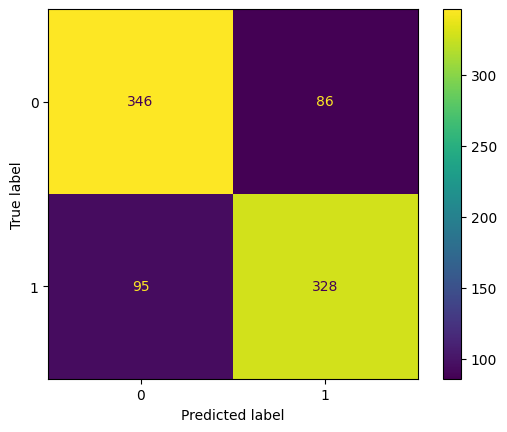

In [5]:
# 创建SVM模型
svm_model = SVC(kernel='rbf')
# CNN的输出为Tensor，需要转化为numpy输入给SVM
# 训练SVM
svm_model.fit(Train_features, train_label)

# 测试
predict_label = svm_model.predict(Test_features)

# 计算分类结果
acc = accuracy_score(test_label, predict_label) 
pre = precision_score(test_label, predict_label) 
recall = recall_score(test_label, predict_label) 
f1score = f1_score(test_label, predict_label) 
print('计算指标结果：\nAcc: %.2f%% \nPre: %.2f%% \nRecall: %.2f%% \nF1-score: %.2f%% ' % (100*acc,100*pre,100*recall,100*f1score))

## 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix(test_label, predict_label))
disp.plot()


模型准确率: 79.44 %
计算指标结果：
Acc: 79.44% 
Pre: 78.65% 
Recall: 80.14% 
F1-score: 79.39% 


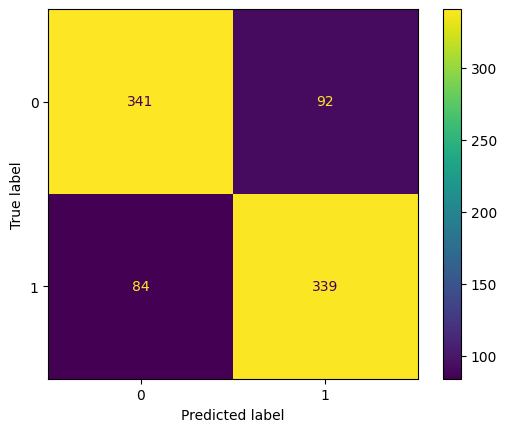

In [9]:
## 只使用3个物理信息
svm_model = SVC(kernel='rbf')
# CNN的输出为Tensor，需要转化为numpy输入给SVM
# 训练SVM
svm_model.fit(train_info, train_label)

# 测试
predict_label = svm_model.predict(test_info)

# 计算模型准确率
accuracy = np.mean(predict_label == test_label)
print(f"模型准确率: {100*accuracy:.2f} %")

# 可视化分类结果
acc = accuracy_score(test_label, predict_label) # acc
pre = precision_score(test_label, predict_label) # pre
recall = recall_score(test_label, predict_label) # reacall
f1score = f1_score(test_label, predict_label) # f1-socre
print('计算指标结果：\nAcc: %.2f%% \nPre: %.2f%% \nRecall: %.2f%% \nF1-score: %.2f%% ' % (100*acc,100*pre,100*recall,100*f1score))

## 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix(test_label,predict_label))
disp.plot()


In [55]:
## ==============================手动提特征==================================
data = np.load("./data_processed/data_mce3d.npy") # 这个是归一化之前的数据
train_server_id = np.load("train_server_id.npy")
test_server_id = np.load("test_server_id.npy")

In [62]:
# CE数量：CN，最大行差：MDR，最大列差：MDC，单个通道最大CE数 MC
## 定义计算CN、MDR、MDC、MOC
def manual_feature_extract(server): # server是单个服务器  16x32x16
    # manual_features = []
    # 计算CN
    CN = np.sum(server)
    
    # 计算MDR MDC
    max_diff_row = []
    max_diff_col = []
    # 依次计算每个特征图
    for i in range(16):
        one_channel = server[i]
        # 找到非零值的索引
        non_zero_indices = np.argwhere(one_channel != 0)
        # 获取最大行数和最大列数
        if non_zero_indices.size > 0:
            max_row = non_zero_indices[:, 0].max()
            min_row = non_zero_indices[:, 0].min()

            max_col = non_zero_indices[:, 1].max()
            min_col = non_zero_indices[:, 1].min()
        else:
            max_row, min_row, max_col, min_col = -1,-1,-1,-1  # 如果没有非零值

        max_diff_row1 = max_row - min_row
        max_diff_col1 = max_col - min_col
        max_diff_row = np.append(max_diff_row, max_diff_row1)
        max_diff_col = np.append(max_diff_col, max_diff_col1)
        
        MDR = max_diff_row.max()
        MDC = max_diff_col.max()
        
        # 计算MOC
        single_channel_sum = np.sum(server,axis=(1,2))
        MOC = single_channel_sum.max()
        manual_features = [CN, MDR, MDC, MOC]
        return manual_features


In [72]:
train_manual_features = []
for i in range(len(train_server_id)):
    server = data[train_server_id[i]]
    manual_features = manual_feature_extract(server)
    train_manual_features.append(manual_features)
    
test_manual_features = []
for i in range(len(test_server_id)):
    server = data[test_server_id[i]]
    manual_features = manual_feature_extract(server)
    test_manual_features.append(manual_features)

In [76]:
Train_manual_features = np.array(train_manual_features)
Test_manual_features = np.array(test_manual_features)

In [80]:
## 把特征合并到一起
Train_features = np.load("Train_features.npy")
Test_features = np.load("Test_features.npy")

In [81]:
Train_Features = np.append(Train_manual_features, Train_features, axis=1)
Test_Features = np.append(Test_manual_features, Test_features, axis=1)

In [82]:
# 存成csv，供Matlab用
df = pd.DataFrame(Train_Features)
df.to_csv('Train_Features.csv', index=False, header=True)

df = pd.DataFrame(Test_Features)
df.to_csv('Test_Features.csv', index=False, header=True)

计算指标结果：
Acc: 52.34% 
Pre: 82.61% 
Recall: 4.49% 
F1-score: 8.52% 


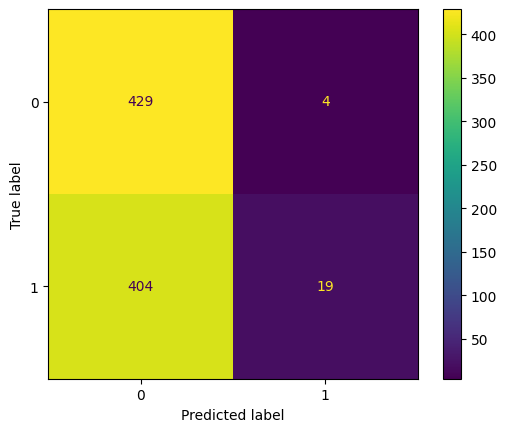

In [94]:
## 试一下SVM分类
train_label = np.load("train_label.npy")
test_label = np.load("test_label.npy")
# 创建SVM模型
svm_model = SVC(kernel='rbf')

# 训练SVM
svm_model.fit(Train_Features, train_label)

# 测试
predict_label = svm_model.predict(Test_Features)

# 计算分类结果
acc = accuracy_score(test_label, predict_label) 
pre = precision_score(test_label, predict_label) 
recall = recall_score(test_label, predict_label) 
f1score = f1_score(test_label, predict_label) 
print('计算指标结果：\nAcc: %.2f%% \nPre: %.2f%% \nRecall: %.2f%% \nF1-score: %.2f%% ' % (100*acc,100*pre,100*recall,100*f1score))

## 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix(test_label, predict_label))
disp.plot()


In [95]:
11*3*15

495